In [9]:
from PIL import Image
import os

img_dir = 'data/content/dataset/jirafas'

for fname in os.listdir(img_dir):
    fpath = os.path.join(img_dir, fname)
    try:
        img = Image.open(fpath)
        img.verify()  # Verifica sin cargar la imagen completa
    except Exception:
        print(f"Imagen inválida eliminada: {fpath}")
        os.remove(fpath)


Imagen inválida eliminada: data/content/dataset/jirafas\jirafa-somalí-giraffa-reticulata-camelopardalis.jpg


In [10]:
#Aumento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 10,
    width_shift_range=0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2
)

data_gen_entrenamiento = datagen.flow_from_directory("data/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("data/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="validation")

Found 866 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


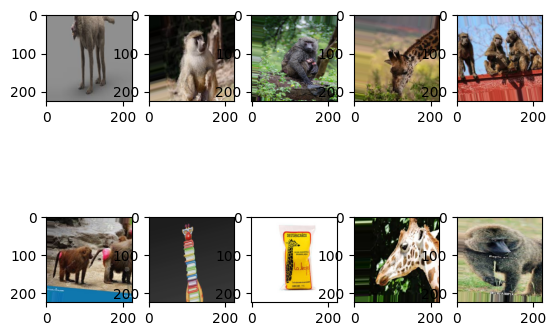

In [11]:
import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imagenes[i])

  break
plt.show()

In [12]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers # Import layers module

# Use the Keras Applications MobileNetV2
mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Importante
# Congelar las capas
mobilenetv2.trainable = False

modelo= tf.keras.Sequential([
    mobilenetv2,
    # Use tf.keras.layers.Dense for the output layer
    layers.Dense(2, activation="softmax")
])

modelo.add(layers.Flatten())  # <-- aplanar antes de Dense
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(2, activation='softmax'))  # 2 clases

modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)



In [14]:
EPOCAS = 20
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS,
    validation_data=data_gen_pruebas
)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 575ms/step - accuracy: 0.9806 - loss: 0.0572 - val_accuracy: 0.9814 - val_loss: 0.0509
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 462ms/step - accuracy: 0.9917 - loss: 0.0330 - val_accuracy: 0.9628 - val_loss: 0.1261
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 473ms/step - accuracy: 0.9884 - loss: 0.0451 - val_accuracy: 0.9767 - val_loss: 0.0588
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 468ms/step - accuracy: 0.9919 - loss: 0.0423 - val_accuracy: 0.9535 - val_loss: 0.1279
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 457ms/step - accuracy: 0.9886 - loss: 0.0346 - val_accuracy: 0.9721 - val_loss: 0.0854
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 477ms/step - accuracy: 0.9866 - loss: 0.0345 - val_accuracy: 0.9674 - val_loss: 0.1005
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 483ms/step - accuracy: 0.9900 - loss: 0.0306 - val_accuracy: 0.9814 - val_loss: 0.0445
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 465ms/step - accuracy: 0.9855 - loss: 0.0360 - val_accu

In [17]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224, 224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [18]:
import os
print(os.listdir())

ruta = "jirafa.jpeg"
prediccion = categorizar(ruta)
print(prediccion)

ruta = "babuino.jpeg"
prediccion = categorizar(ruta)
print(prediccion)

['data', 'main.ipynb']


FileNotFoundError: [Errno 2] No such file or directory: 'jirafa.jpeg'